In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

<h2>5.1 Linear SVM</h2>

<h4>Applying Linear SVM on Bag Of Words</h4>

In [2]:
import pickle
with open('train_bow.pickle', 'rb') as f:
    x_bow=pickle.load(f)
with open('test_bow.pickle','rb') as f:
    test_bow=pickle.load(f)

In [3]:
#loading y_train and y_test dataset
with open('y_train.pickle', 'rb') as f:
    y_bow=pickle.load(f)
with open('y_test.pickle','rb') as f:
    y_test=pickle.load(f)

In [4]:
x_bow=normalize(x_bow,axis=0)
test_bow=normalize(test_bow,axis=0)

In [5]:
x_train,x_cv , y_train, y_cv = train_test_split(x_bow, y_bow, test_size=0.2, random_state=42,shuffle=False)

In [6]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier

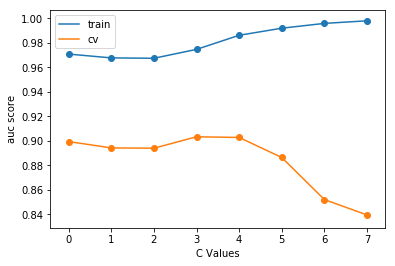

In [7]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
C_set=[0.001,0.01, 0.1, 1, 10, 100,1000,10000]
train_metric = []
cv_metric= []
for i in C_set:
    clf=LinearSVC(loss='hinge',C=i)
    clf.fit(x_train, y_train)
    y_hat = clf.decision_function(x_train)
    train_metric.append(roc_auc_score(y_train, y_hat))
    y_hat = clf.decision_function(x_cv)
    cv_metric.append(roc_auc_score(y_cv, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

In [18]:
from sklearn.grid_search import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
parameter={'penalty':["l1","l2"],'C':[1]}
clf = GridSearchCV(LinearSVC(loss='l2',dual=False),parameter,verbose=2)
clf.fit(x_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=1, penalty=l1 .................................................
[CV] ........................................ C=1, penalty=l1 -   1.0s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ........................................ C=1, penalty=l1 -   1.3s
[CV] C=1, penalty=l1 .................................................
[CV] ........................................ C=1, penalty=l1 -   1.4s
[CV] C=1, penalty=l2 .................................................
[CV] ........................................ C=1, penalty=l2 -   0.8s
[CV] C=1, penalty=l2 .................................................
[CV] ........................................ C=1, penalty=l2 -   0.6s
[CV] C=1, penalty=l2 .................................................
[CV] ........................................ C=1, penalty=l2 -   1.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.6s finished


0.8956149786127023
{'C': 1, 'penalty': 'l1'}


In [9]:
clf=LinearSVC(loss='l2',penalty='l1',C=1,dual=False)
clf.fit(x_bow,y_bow)
pred=clf.predict(test_bow)
score=roc_auc_score(y_test, pred) * float(100)
print(score,"%")
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

80.48678048288251 %
[[ 2370  1304]
 [  627 17116]]


Text(0.5,1,'Confusion Matrix\n')

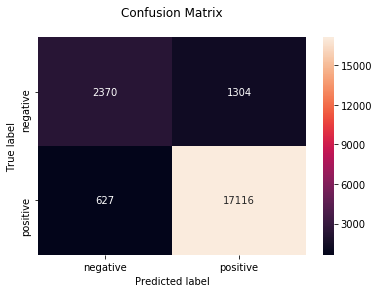

In [10]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

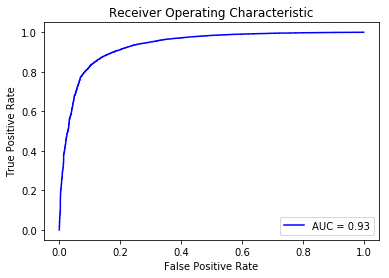

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from matplotlib import pyplot as plt
clf.fit(x_bow, y_bow)
score_roc = clf.decision_function(test_bow)
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc)
roc_auc =metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
#feature importance
with open('bow_features.pickle','rb') as f:
    bow_features=pickle.load(f)

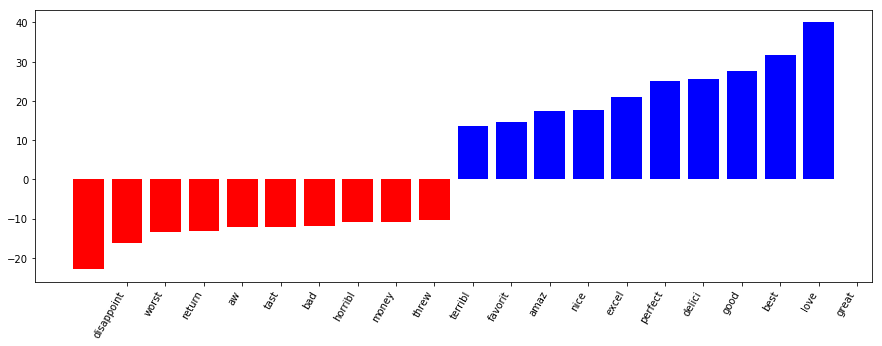

In [13]:
top_features=10
classifier=clf
feature_names=bow_features
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
# create plot
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

<h4>Applying linearsvm on TFIDF</h4>

In [10]:
import pickle
with open('train_tfidf.pickle', 'rb') as f:
    x_tfidf=pickle.load(f)
with open('test_tfidf.pickle','rb') as f:
    test_tfidf=pickle.load(f)

In [11]:
import pickle
with open('y_train_tfidf.pickle', 'rb') as f:
    y_tfidf=pickle.load(f)
with open('y_test_tfidf.pickle','rb') as f:
    y_test_tfidf=pickle.load(f)

In [12]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
x_tfidf = normalize(x_tfidf, axis=0)
test_tfidf = normalize(test_tfidf, axis=0)

In [13]:
x_train_tfidf,x_cv_tfidf , y_train_tfidf, y_cv_tfidf = train_test_split(x_tfidf, y_tfidf, test_size=0.2, random_state=42,shuffle=False)

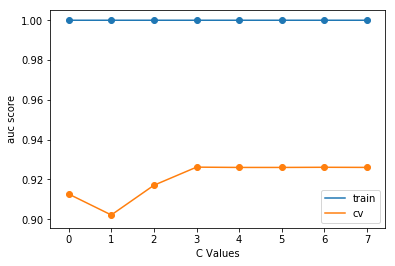

In [19]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
C_set=[0.001,0.01, 0.1, 1, 10, 100,1000,10000]
train_metric = []
cv_metric= []
for i in C_set:
    clf=LinearSVC(loss='hinge',C=i)
    clf.fit(x_train_tfidf, y_train_tfidf)
    y_hat = clf.decision_function(x_train_tfidf)
    train_metric.append(roc_auc_score(y_train_tfidf, y_hat))
    y_hat = clf.decision_function(x_cv_tfidf)
    cv_metric.append(roc_auc_score(y_cv_tfidf, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

In [20]:
from sklearn.grid_search import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
parameter={'penalty':["l1","l2"],'C':[1]}
clf = GridSearchCV(LinearSVC(loss='l2',dual=False),parameter,verbose=2)
clf.fit(x_train_tfidf, y_train_tfidf)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=1, penalty=l1 .................................................
[CV] ........................................ C=1, penalty=l1 -   6.7s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] ........................................ C=1, penalty=l1 -   6.3s
[CV] C=1, penalty=l1 .................................................
[CV] ........................................ C=1, penalty=l1 -   6.4s
[CV] C=1, penalty=l2 .................................................
[CV] ........................................ C=1, penalty=l2 -  13.7s
[CV] C=1, penalty=l2 .................................................
[CV] ........................................ C=1, penalty=l2 -  12.6s
[CV] C=1, penalty=l2 .................................................
[CV] ........................................ C=1, penalty=l2 -  11.3s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   57.7s finished


0.8813817945318558
{'C': 1, 'penalty': 'l1'}


In [21]:
clf=LinearSVC(loss='l2',penalty='l1',C=1,dual=False)
clf.fit(x_tfidf,y_tfidf)
pred=clf.predict(test_tfidf)
score=roc_auc_score(y_test_tfidf, pred) * float(100)
print(score,"%")
conf_matrix = confusion_matrix(y_test_tfidf, pred)
print(conf_matrix)

78.86021340624843 %
[[ 2254  1420]
 [  644 17099]]


Text(0.5,1,'Confusion Matrix\n')

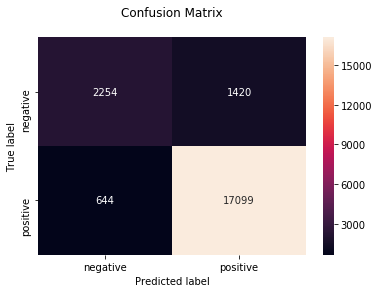

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

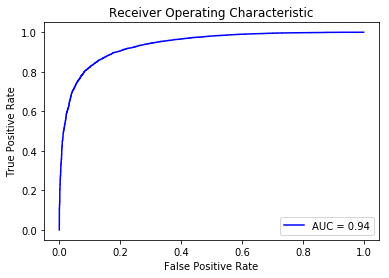

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from matplotlib import pyplot as plt
score_roc = clf.decision_function(test_tfidf)
fpr, tpr, thresholds = metrics.roc_curve(y_test_tfidf, score_roc)
roc_auc =metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
with open('tfidf_features.pickle','rb') as f:
    tfidf_features=pickle.load(f)

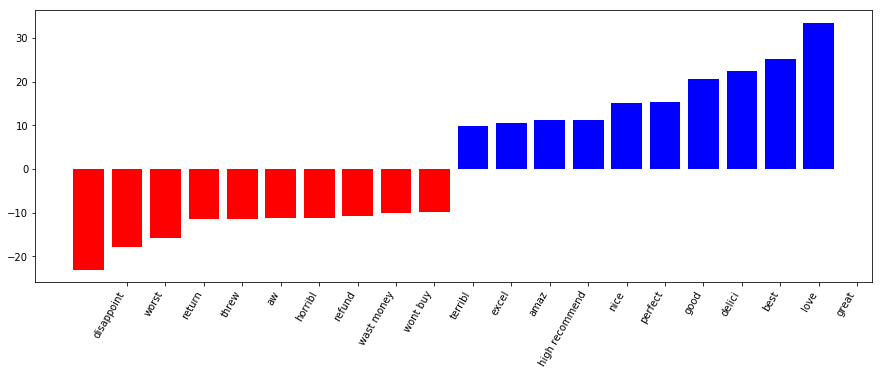

In [25]:
top_features=10
classifier=clf
feature_names=tfidf_features
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
# create plot
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

<h4>Applying linearsvm on avg w2v</h4>

In [2]:
import pickle
with open('train_avgw2v.pickle', 'rb') as f:
    x_avgw2v=pickle.load(f)
with open('test_avgw2v.pickle','rb') as f:
    test_avgw2v=pickle.load(f)

In [3]:
#loading y_train and y_test dataset
with open('y_train_avgw2v.pickle', 'rb') as f:
    y_avgw2v=pickle.load(f)
with open('y_test_avgw2v.pickle','rb') as f:
    y_test_avgw2v=pickle.load(f)

In [4]:
x_avgw2v=normalize(x_avgw2v,axis=0)
test_avgw2v=normalize(test_avgw2v,axis=0)

In [5]:
x_train_avgw2v,x_cv_avgw2v, y_train_avgw2v, y_cv_avgw2v = train_test_split(x_avgw2v,y_avgw2v, test_size=0.2, random_state=42,shuffle=False)

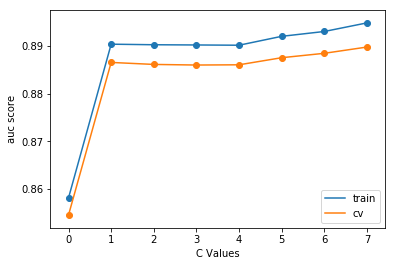

In [30]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
C_set=[0.001,0.01, 0.1, 1, 10, 100,1000,10000]
train_metric = []
cv_metric= []
for i in C_set:
    clf=LinearSVC(loss='hinge',C=i)
    clf.fit(x_train_avgw2v, y_train_avgw2v)
    y_hat = clf.decision_function(x_train_avgw2v)
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.decision_function(x_cv_avgw2v)
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

In [32]:
from sklearn.grid_search import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
parameter={'penalty':["l1","l2"],'C':[0.01]}
clf = GridSearchCV(LinearSVC(loss='l2',dual=False),parameter,verbose=2)
clf.fit(x_train_avgw2v, y_train_avgw2v)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..................................... C=0.01, penalty=l1 -   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..................................... C=0.01, penalty=l1 -   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.01, penalty=l1 ..............................................
[CV] ..................................... C=0.01, penalty=l1 -   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..................................... C=0.01, penalty=l2 -   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..................................... C=0.01, penalty=l2 -   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..................................... C=0.01, penalty=l2 -   0.0s
0.8425094429296845
{'C': 0.01, 'penalty': 'l1'}


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s finished


In [33]:
clf=LinearSVC(loss='l2',penalty='l1',C=1000,dual=False)
clf.fit(x_avgw2v,y_avgw2v)
pred=clf.predict(test_avgw2v)
score=roc_auc_score(y_test_avgw2v, pred) * float(100)
print(score,"%")
conf_matrix = confusion_matrix(y_test_avgw2v, pred)
print(conf_matrix)

66.53073270693578 %
[[ 1312  2362]
 [  470 17273]]


Text(0.5,1,'Confusion Matrix\n')

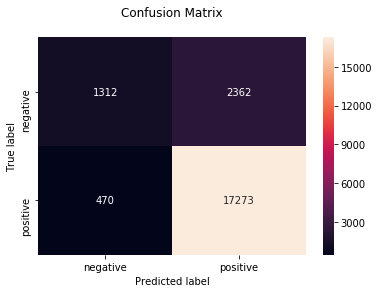

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

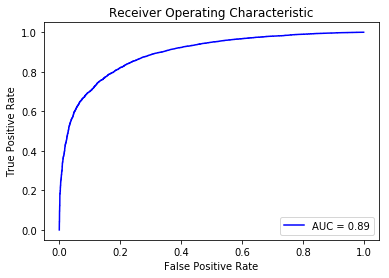

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from matplotlib import pyplot as plt
score_roc = clf.decision_function(test_avgw2v)
fpr, tpr, thresholds = metrics.roc_curve(y_test_avgw2v, score_roc)
roc_auc =metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h4>Applying linear svm on tfidf w2v</h4>

In [17]:
import pickle
with open('x_train_tfidf_w2v.pickle', 'rb') as f:
    train_tfidf_w2v=pickle.load(f)
with open('x_test_tfidf_w2v.pickle','rb') as f:
    test_tfidf_w2v=pickle.load(f)

In [18]:
import pickle
with open('y_train_tfidf_w2v.pickle', 'rb') as f:
    y_train=pickle.load(f)
with open('y_test_tfidf_w2v.pickle','rb') as f:
    y_test=pickle.load(f)

In [19]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
train_tfidf_w2v = normalize(train_tfidf_w2v, axis=0)
test_tfidf_w2v = normalize(test_tfidf_w2v, axis=0)

In [20]:
from sklearn.model_selection import train_test_split
x_train_tfidf_w2v,x_cv_tfidf_w2v , y_train_tfidf_w2v, y_cv_tfidf_w2v = train_test_split(train_tfidf_w2v, y_train, test_size=0.2, random_state=42,shuffle=False)

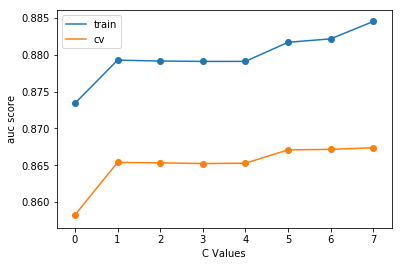

In [42]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
C_set=[0.001,0.01, 0.1, 1, 10, 100,1000,10000]
train_metric = []
cv_metric= []
for i in C_set:
    clf=LinearSVC(loss='hinge',C=i)
    clf.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)
    y_hat = clf.decision_function(x_train_tfidf_w2v)
    train_metric.append(roc_auc_score(y_train_tfidf_w2v, y_hat))
    y_hat = clf.decision_function(x_cv_tfidf_w2v)
    cv_metric.append(roc_auc_score(y_cv_tfidf_w2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

In [44]:
from sklearn.grid_search import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
parameter={'penalty':["l1","l2"],'C':[100]}
clf = GridSearchCV(LinearSVC(loss='l2',dual=False),parameter,verbose=2)
clf.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=100, penalty=l1 ...............................................
[CV] ...................................... C=100, penalty=l1 -  20.6s
[CV] C=100, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s remaining:    0.0s


[CV] ...................................... C=100, penalty=l1 -  21.9s
[CV] C=100, penalty=l1 ...............................................
[CV] ...................................... C=100, penalty=l1 -  23.2s
[CV] C=100, penalty=l2 ...............................................
[CV] ...................................... C=100, penalty=l2 -   0.5s
[CV] C=100, penalty=l2 ...............................................
[CV] ...................................... C=100, penalty=l2 -   0.5s
[CV] C=100, penalty=l2 ...............................................
[CV] ...................................... C=100, penalty=l2 -   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min finished


0.8744528103659605
{'C': 100, 'penalty': 'l1'}


In [45]:
clf=LinearSVC(loss='l2',penalty='l1',C=100,dual=False)
clf.fit(train_tfidf_w2v,y_train)
pred=clf.predict(test_tfidf_w2v)
score=roc_auc_score(y_test, pred) * float(100)
print(score,"%")
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

73.39705407306552 %
[[ 1241  1122]
 [  682 11233]]


Text(0.5,1,'Confusion Matrix\n')

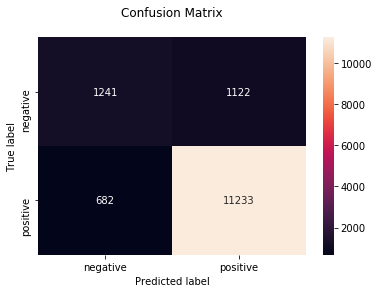

In [48]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

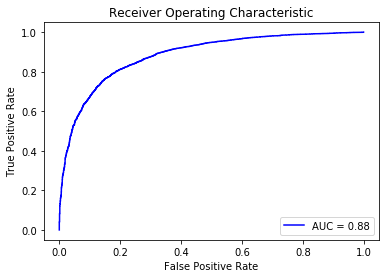

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from matplotlib import pyplot as plt
score_roc = clf.decision_function(test_tfidf_w2v)
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc)
roc_auc =metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h2>RBF SVM</h2>

<h3> Applying RBF SVM on BOW</h3>

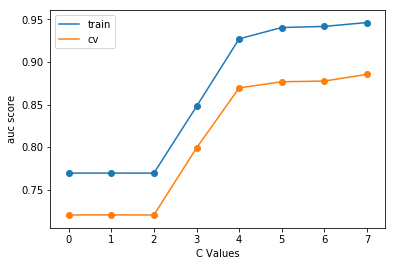

In [57]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
C_set=[0.001,0.01, 0.1, 1, 10, 100,1000,10000]
train_metric = []
cv_metric= []
for i in C_set:
    clf=SVC(kernel='rbf',C=i,random_state=0)
    clf.fit(x_train, y_train)
    y_hat = clf.decision_function(x_train)
    train_metric.append(roc_auc_score(y_train, y_hat))
    y_hat = clf.decision_function(x_cv)
    cv_metric.append(roc_auc_score(y_cv, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

In [6]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
gamma_set=[0.1, 1, 10, 100,1000]
train_metric = []
cv_metric= []
for i in gamma_set:
    clf=SVC(kernel='rbf',C=10000,gamma=i,random_state=0)
    clf.fit(x_train, y_train)
    y_hat = clf.decision_function(x_train)
    train_metric.append(roc_auc_score(y_train, y_hat))
    y_hat = clf.decision_function(x_cv)
    cv_metric.append(roc_auc_score(y_cv, y_hat))

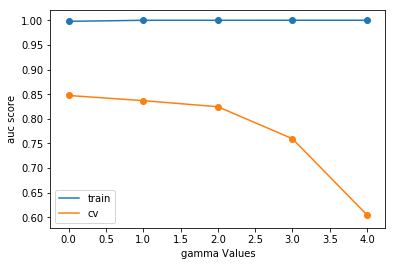

In [7]:
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4],cv_metric)
plt.xlabel('gamma Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

In [8]:
clf=SVC(kernel='rbf',C=10000,gamma=0.1)
clf.fit(x_bow,y_bow)
pred=clf.predict(test_bow)
score=roc_auc_score(y_test, pred) * float(100)
print(score,"%")
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

77.75235472806852 %
[[ 2413  1261]
 [ 1805 15938]]


Text(0.5,1,'Confusion Matrix\n')

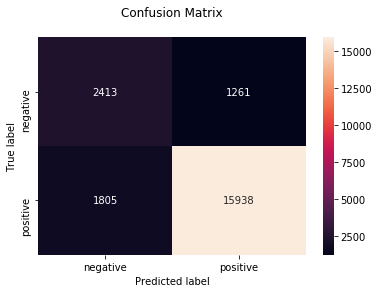

In [10]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

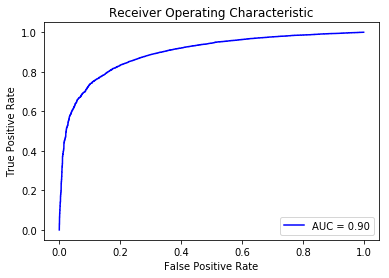

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from matplotlib import pyplot as plt
score_roc = clf.decision_function(test_bow)
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc)
roc_auc =metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Applying RBF SVM on TFIDF</h3>

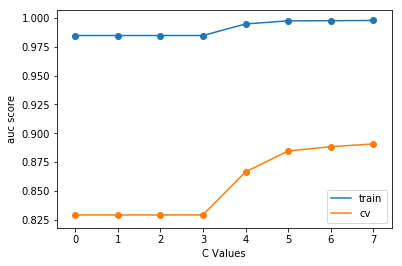

In [14]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
C_set=[0.001,0.01, 0.1, 1, 10, 100,1000,10000]
train_metric = []
cv_metric= []
for i in C_set:
    clf=SVC(kernel='rbf',C=i)
    clf.fit(x_train_tfidf, y_train_tfidf)
    y_hat = clf.decision_function(x_train_tfidf)
    train_metric.append(roc_auc_score(y_train_tfidf, y_hat))
    y_hat = clf.decision_function(x_cv_tfidf)
    cv_metric.append(roc_auc_score(y_cv_tfidf, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

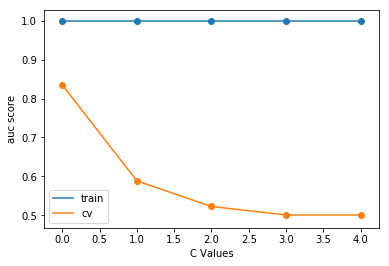

In [15]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
gamma_set=[ 0.1, 1, 10, 100,1000]
train_metric = []
cv_metric= []
for i in gamma_set:
    clf=SVC(kernel='rbf',C=10000,gamma=i)
    clf.fit(x_train_tfidf, y_train_tfidf)
    y_hat = clf.decision_function(x_train_tfidf)
    train_metric.append(roc_auc_score(y_train_tfidf, y_hat))
    y_hat = clf.decision_function(x_cv_tfidf)
    cv_metric.append(roc_auc_score(y_cv_tfidf, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv") 
plt.scatter([0,1,2,3,4],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

In [17]:
clf=SVC(kernel='rbf',C=10000,gamma=0.1)
clf.fit(x_tfidf,y_tfidf)
pred=clf.predict(test_tfidf)
score=roc_auc_score(y_test_tfidf, pred) * float(100)
print(score,"%")
conf_matrix = confusion_matrix(y_test_tfidf, pred)
print(conf_matrix)

51.60024312531449 %
[[  118  3556]
 [    2 17741]]


Text(0.5,1,'Confusion Matrix\n')

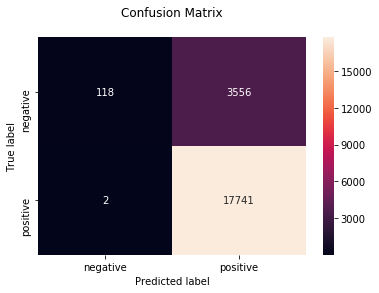

In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

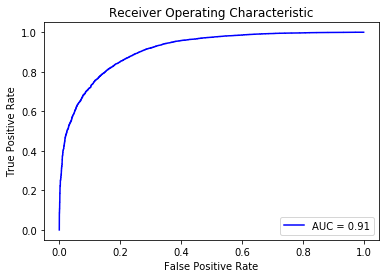

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from matplotlib import pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test_tfidf, score_roc)
roc_auc =metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Applying RBF SVM on AVG W2V</h3>

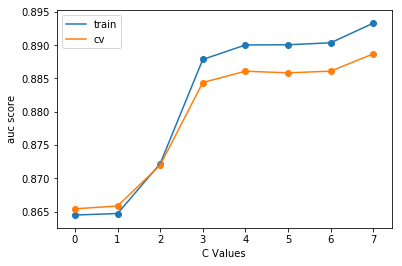

In [6]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
C_set=[0.001,0.01, 0.1, 1, 10, 100,1000,10000]
train_metric = []
cv_metric= []
for i in C_set:
    clf=SVC(C=i)
    clf.fit(x_train_avgw2v, y_train_avgw2v)
    y_hat = clf.decision_function(x_train_avgw2v)
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.decision_function(x_cv_avgw2v)
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

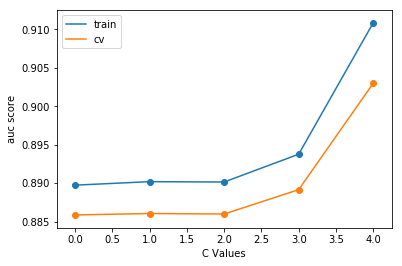

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
gamma_set=[0.01, 0.1, 1, 10, 100]
train_metric = []
cv_metric= []
for i in gamma_set:
    clf=SVC(C=10,gamma=i)
    clf.fit(x_train_avgw2v, y_train_avgw2v)
    y_hat = clf.decision_function(x_train_avgw2v)
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.decision_function(x_cv_avgw2v)
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

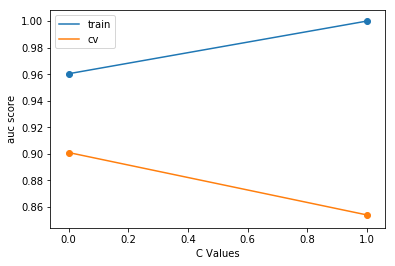

In [8]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
gamma_set=[ 1000, 10000]
train_metric = []
cv_metric= []
for i in gamma_set:
    clf=SVC(C=10,gamma=i)
    clf.fit(x_train_avgw2v, y_train_avgw2v)
    y_hat = clf.decision_function(x_train_avgw2v)
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.decision_function(x_cv_avgw2v)
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

In [9]:
clf=SVC(C=10,gamma=1000)
clf.fit(x_avgw2v,y_avgw2v)
pred=clf.predict(test_avgw2v)
score=roc_auc_score(y_test_avgw2v, pred) * float(100)
print(score,"%")
conf_matrix = confusion_matrix(y_test_avgw2v, pred)
print(conf_matrix)

67.44372664803966 %
[[ 1441  2233]
 [  769 16974]]


Text(0.5,1,'Confusion Matrix\n')

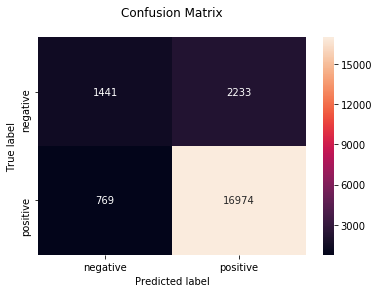

In [10]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

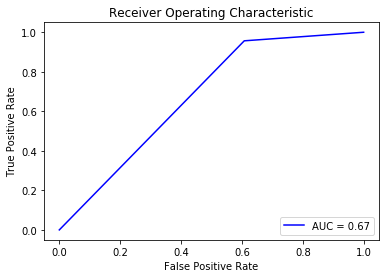

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from matplotlib import pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test_avgw2v, pred)
roc_auc =metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Applying RBF SVM on TFIDF W2V</h3>

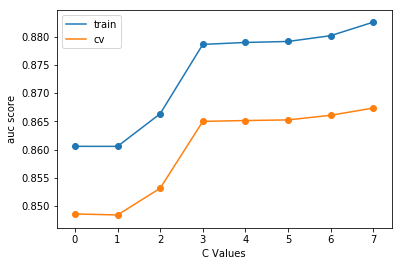

In [69]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
C_set=[0.001,0.01, 0.1, 1, 10, 100,1000,10000]
train_metric = []
cv_metric= []
for i in C_set:
    clf=SVC(kernel='rbf',C=i)
    clf.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)
    y_hat = clf.decision_function(x_train_tfidf_w2v)
    train_metric.append(roc_auc_score(y_train_tfidf_w2v, y_hat))
    y_hat = clf.decision_function(x_cv_tfidf_w2v)
    cv_metric.append(roc_auc_score(y_cv_tfidf_w2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
gamma_set=[ 0.1, 1, 10, 100,1000]
train_metric = []
cv_metric= []
for i in gamma_set:
    clf=SVC(kernel='rbf',C=10000,gamma=i)
    clf.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)
    y_hat = clf.decision_function(x_train_tfidf_w2v)
    train_metric.append(roc_auc_score(y_train_tfidf_w2v, y_hat))
    y_hat = clf.decision_function(x_cv_tfidf_w2v)
    cv_metric.append(roc_auc_score(y_cv_tfidf_w2v, y_hat))

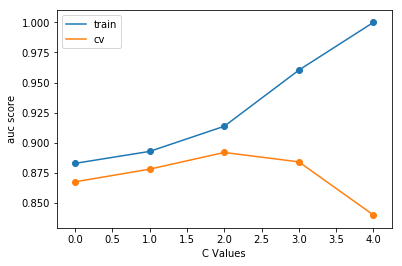

In [8]:
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4],cv_metric)
plt.xlabel('C Values')
plt.ylabel('auc score')
plt.legend()
plt.show()

In [21]:
clf=SVC(kernel='rbf',C=10000,gamma=10)
clf.fit(train_tfidf_w2v,y_train)
pred=clf.predict(test_tfidf_w2v)
score=roc_auc_score(y_test, pred) * float(100)
print(score,"%")
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

66.87245617097692 %
[[  891  1472]
 [  472 11443]]


Text(0.5,1,'Confusion Matrix\n')

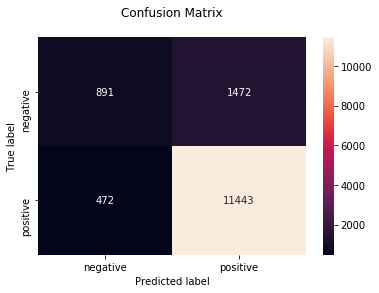

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

<h2>Observation</h2>

|           |C|Penalty|roc_auc_score|kernel|
|-----------|--|-------|-------------|------|
|BOW| 1|l1| 80.48%| linear|
|TFIDF| 1|l1| 78.86|linear|
|Avgw2v|1000|l1|66.53%|linear|
|TFIDF W2V| 100|l1|73.39|linear|


|           |C|gamma|roc_auc_score|kernel|
|--------|---|---|--|--|
|BOW|10000|0.1|77.75|rbf|
|TFIDF|10000|0.1|51.60%|rbf|
|Avgw2v|10|1000|67.44%|rbf|
|TFIDF W2V|10000|10|66.87|rbf|